In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
try:
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

In [ ]:
df['v2'] = df['v2'].apply(preprocess_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

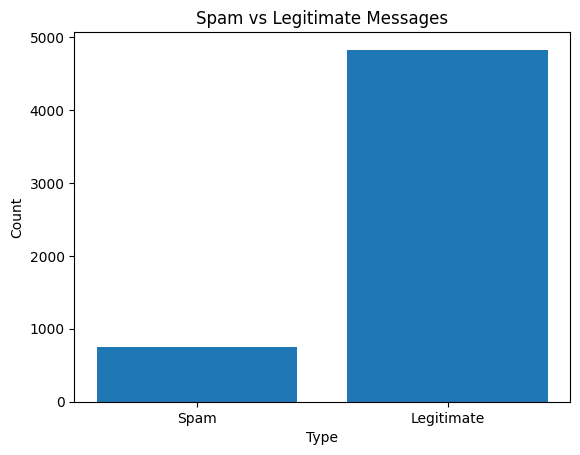

In [ ]:
spam_count = df['v1'].value_counts()['spam']
legitimate_count = df['v1'].value_counts()['ham']

plt.bar(['Spam', 'Legitimate'], [spam_count, legitimate_count])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Spam vs Legitimate Messages')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9740
Precision: 1.0000
Recall: 0.8067
F1 Score: 0.8930


In [ ]:
def predict_message(message):
    message = preprocess_text(message)
    message_tfidf = vectorizer.transform([message])
    prediction = model.predict(message_tfidf)
    return prediction[0]

new_message = "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize."
print(predict_message(new_message))

spam
